In [2]:
from alexnet_pytorch import AlexNet
model = AlexNet.from_name('alexnet')

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms
import numpy as np
from PIL import Image
import torch
import torch.nn as nn
from torchvision import models
from torch.autograd import Variable
import torchvision.transforms as transforms
import numpy as np
from numpy.fft import rfft2, irfft2
from sklearn import svm
import cv2
from matplotlib import pyplot as plt
import joblib
import os

In [2]:
model = models.vgg19(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to C:\Users\Admin/.cache\torch\hub\checkpoints\vgg19-dcbb9e9d.pth
100.0%


In [112]:
input_image = Image.open("dog.jpg")

In [3]:
preprocess = transforms.Compose([
    transforms.Scale(256),
    transforms.CenterCrop(227),
    transforms.ToTensor()    
])

D:\anaconda\envs\CS231\lib\site-packages\torchvision\transforms\transforms.py:310: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


In [4]:
data_train = []
tags = []
for file in os.listdir(path="train/dog"):
    data_train.append(file)
    tags.append(0)
for file in os.listdir(path="train/cat"):
    data_train.append(file)
    tags.append(1)
total_files_train = len(data_train)
total_files_train
data_train

['00000000.jpg',
 '00000001.jpg',
 '00000002.jpg',
 '00000004.jpg',
 '00000005.jpg',
 '00000006.jpg',
 '00000007.jpg',
 '00000009.jpg',
 '00000010.jpg',
 '00000011.jpg',
 '00000013.jpg',
 '00000014.jpg',
 '00000016.jpg',
 '00000017.jpg',
 '00000018.jpg',
 '00000019.jpg',
 '00000021.jpg',
 '00000023.jpg',
 '00000024.jpg',
 '00000025.jpg',
 '00000026.jpg',
 '00000027.jpg',
 '00000028.jpg',
 '00000030.jpg',
 '00000031.jpg',
 '00000032.jpg',
 '00000033.jpg',
 '00000034.jpg',
 '00000035.jpg',
 '00000036.jpg',
 '00000037.jpg',
 '00000038.jpg',
 '00000039.jpg',
 '00000040.jpg',
 '00000041.jpg',
 '00000042.jpg',
 '00000044.jpg',
 '00000045.jpg',
 '00000046.jpg',
 '00000047.jpg',
 '00000048.jpg',
 '00000049.jpg',
 '00000051.jpg',
 '00000052.jpg',
 '00000053.jpg',
 '00000054.jpg',
 '00000055.jpg',
 '00000056.jpg',
 '00000057.jpg',
 '00000058.jpg',
 '00000059.jpg',
 '00000060.jpg',
 '00000061.jpg',
 '00000062.jpg',
 '00000064.jpg',
 '00000065.jpg',
 '00000066.jpg',
 '00000067.jpg',
 '00000068.jpg

In [5]:
features=[]
dir=""
for i in range(total_files_train):
    if tags[i]==0:
      dir="dog"
    else:
      dir="cat"
    img_pil = Image.open("train" +"/" + dir + "/" + data_train[i])
    #print(dir + data_train[i])
    img_tensor = preprocess(img_pil)
    img_tensor.unsqueeze_(0)
    img_var = Variable(img_tensor)
    out = model(img_var)
    newOut = np.squeeze(out)
    features.append(np.squeeze(out.data.numpy()))

In [6]:
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [7]:
import numpy as np

from sklearn import svm
import torch
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import classification_report

In [8]:
x_train, x_test, tags, Y_test = train_test_split(features, tags, test_size = 0.2, random_state = 42)

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Train score:  1.0
Test score:  0.9605263157894737
Confusion matrix, without normalization
[[41  3]
 [ 0 32]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        44
           1       0.91      1.00      0.96        32

    accuracy                           0.96        76
   macro avg       0.96      0.97      0.96        76
weighted avg       0.96      0.96      0.96        76



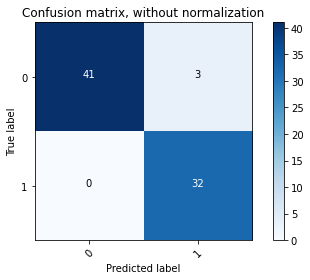

In [22]:
# SVM classifier for best value of the hyperparameter C
clf = svm.SVC(  kernel = 'linear')
clf.fit( x_train, tags )
print("Train score: ", clf.score(x_train, tags))
print("Test score: ",clf.score(x_test,Y_test))
y_pred=clf.predict(x_test)
cnf_matrix_nb = confusion_matrix(Y_test, y_pred, labels=[0, 1])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix_nb, classes=[0, 1],
                      title='Confusion matrix, without normalization')
print(classification_report(Y_test, y_pred,target_names=[ '0', '1']))

In [13]:
joblib.dump(clf, 'SVM1.pkl')

['SVM1.pkl']

In [14]:
joblib.dump(clf, 'SVM1.pkl')

In [15]:
def showImage(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.show()

In [16]:
test_file=[file for file in os.listdir(path="test")]
test_file


['241359686_609556757081102_8771103420910420534_n.jpg',
 '243023851_165919439030794_7987506125901704314_n.jpg',
 '243050404_834531447242274_1603814852712174704_n.jpg',
 '244118277_3022983364581391_1765007275111144168_n.jpg',
 '244213704_295446099082661_1845425252221023756_n.jpg',
 '244494867_580045980085086_8648340180424365380_n.jpg',
 '79429312_2505519429661123_1942977904027631616_n.jpg',
 'test1.jpg',
 'test10.jpg',
 'test11.jpg',
 'test12.jpg',
 'test2.jpg',
 'test3.jpg',
 'test4.jpg',
 'test5.jpg',
 'test6.jpg',
 'test7.jpg',
 'test8.jpg',
 'test9.jpg']

In [17]:
def ShowResult(img_name):
  img=cv2.imread(img_name)
  from PIL import Image
  import requests

  #img_pil = Image.open(requests.get(url, stream=True).raw)
  img_pil = Image.open(img_name)

  # img_pil = Image.open('/Users/sahilmishra/Desktop/Pictures/Dataset/image178.jpg')
  img_tensor = preprocess(img_pil)
  img_tensor.unsqueeze_(0)
  img_var = Variable(img_tensor)
  out = model(img_var)
  #print(type(out))
  #print(out)
  newOut = np.squeeze(out)
  pred = clf.predict(out.data.numpy())
  text="cat"
  if pred==0:
    text="dog"
  cv2.putText(img,text,(10, 25),cv2.FONT_HERSHEY_SIMPLEX,0.7, (0,0,255), 2)
  print(text)
  showImage(img)

In [ ]:
for  img_name in test_file:
  ShowResult("test" + "/" +img_name)